In [1]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.dense as oti
eps = oti.e

from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from ode_solve import *

In [2]:
from scipy.special import comb

In [3]:
order = 20
var = 5

comb(order+var,order, exact = True)

53130

In [98]:
# Define functions



def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2]


# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, x**3-x]

# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, -x**2]

def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x]

def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -oti.sin(x)]

# Stiff ode: system that describes the chemical reaction of Robertson
def F_eval( t, X ):
    x = X[0]
    y = X[1]
    z = X[2]
    
    res = [
        -0.04*x + 10**4 *y *z,
        0.04*x - 10**4*y*z - 3*10**7 * y**2,
        3*10**7 * y**2,
    ]
    return res

In [99]:
# Define initial value (starting point of the streamline).

# x0 = [ -1.0, 2.0]
zero = 0*oti.e(1)
x0 = [ 1.3+zero, 0.0+zero]
x0 = [ 1.0+zero, 1.0+zero,1.0+zero]

# x0 = [ 0, -2.0]

t0 = 0.0

In [41]:
F_eval(0,x0)

[0 + 0 * e([1]), -0.963558 - 0 * e([1])]

In [42]:
# %timeit F_eval(t0,x0)

In [106]:
order = 10
epsilon = 1e-4
x, dt_est = ode_step(F_eval, x0, t0, eps = epsilon , order = order )

print("\nx0 :",x[0])
print("\nx1 :",x[1])

print("dt estimate: ",dt_est)

xf = np.array(X(dt_est,x))


x0 : 1 + 9999.96 * e([1]) - 5e+07 * e([[1,2]]) - 3.001e+18 * e([[1,3]]) + 1.35075e+26 * e([[1,4]]) - 4.86315e+33 * e([[1,5]]) + 1.62114e+41 * e([[1,6]]) - 5.211e+48 * e([[1,7]]) + 1.64151e+56 * e([[1,8]]) - 5.10703e+63 * e([[1,9]]) + 1.57591e+71 * e([[1,10]])

x1 : 1 - 3.001e+07 * e([1]) + 9.003e+14 * e([[1,2]]) - 2.7009e+22 * e([[1,3]]) + 8.1027e+29 * e([[1,4]]) - 2.43081e+37 * e([[1,5]]) + 7.29243e+44 * e([[1,6]]) - 2.18773e+52 * e([[1,7]]) + 6.56319e+59 * e([[1,8]]) - 1.96896e+67 * e([[1,9]]) + 5.90687e+74 * e([[1,10]])
dt estimate:  1.3981078172430872e-08


In [65]:
# %timeit F_eval(t0,x)

In [108]:
xf

array([1.00013501, 0.7044583 , 1.29540669])

In [109]:
%timeit sol = ode_integrate( F_eval, x0, 0., 40., eps=1e-6, order = 3, niter_max=1000000)

KeyboardInterrupt: 

In [112]:
sol = ode_integrate( F_eval, x0, 0., 40., eps=1e-6, order = 10, niter_max=1000000)

In [79]:
x0

[1.3 + 0 * e([1]), 0 + 0 * e([1])]

In [80]:
sol[0]

[[1.3 + 0 * e([1]), 0 + 0 * e([1])], [1.3 + 0 * e([1]), 0 + 0 * e([1])], 0.0]

In [81]:
solArr = np.array(sol,dtype= object)

import pandas as pd

data = pd.DataFrame(data = solArr, columns=['xf','x_oti','t'])

In [82]:
data

,xf,x_oti,t
0,"[1.3 + 0 * e([1]), 0 + 0 * e([1])]","[1.3 + 0 * e([1]), 0 + 0 * e([1])]",0.0
1,"[1.0619492549124205, -0.6628310968637147]","[1.3 + 0 * e([1]) - 0.481779 * e([[1,2]]) - 0 ...",0.707539
2,"[0.4694071120196543, -1.1174404590536262]",[1.06195 - 0.662831 * e([1]) - 0.436653 * e([[...,1.356673
3,"[-0.19559025964410515, -1.1945162635303197]",[0.469407 - 1.11744 * e([1]) - 0.226179 * e([[...,1.917118
4,"[-0.7858495585461267, -0.9373238622502247]",[-0.19559 - 1.19452 * e([1]) + 0.0971728 * e([...,2.45902
...,...,...,...
161,"[1.2181376761160059, 0.3947396723405237]",[0.843305 + 0.891642 * e([1]) - 0.373423 * e([...,97.856536
162,"[1.268250594498549, -0.2468497847781762]",[1.21814 + 0.39474 * e([1]) - 0.469229 * e([[1...,98.526579
163,"[0.8884722256836087, -0.8521916519207197]",[1.26825 - 0.24685 * e([1]) - 0.477291 * e([[1...,99.205623
164,"[0.2883473850201015, -1.1757812650478436]",[0.888472 - 0.852192 * e([1]) - 0.388055 * e([...,99.783899


In [92]:
tf =5.0
order = 10 
epsilon = 1e-6
sols = [] 

for i in range(1,order + 1):
    sols.append( ode_integrate( F_eval, x0, t0, tf, eps=epsilon, order = i,niter_max=100000) )
# end for 


In [93]:
solArray = np.array(sols[9],dtype = object)


In [94]:
def stats_ode_sol(ode_sols):

    for sol in ode_sols:
        
        solArr = np.array(sol, dtype= object)
        
        ti = solArr[:-1,2]
        tf = solArr[1:,2]
        dt = tf-ti
        sol_order = sol[1][1][0].order
        print("")
        print("Evaluated order : ", sol_order)
        print("Number of integration steps:", len(sol)-1)
        print("Number of calls to F:", (len(sol)-1)*sol_order)
        
        print("Max dt: ",np.max(dt))
        print("Min dt: ",np.min(dt))
        

    # end for 
# end 
        
        

In [95]:
stats_ode_sol(sols)


Evaluated order :  1
Number of integration steps: 3537
Number of calls to F: 3537
Max dt:  0.0014658729860855813
Min dt:  0.001284850003071547

Evaluated order :  2
Number of integration steps: 260
Number of calls to F: 520
Max dt:  0.02855291638722314
Min dt:  0.016231546518413076

Evaluated order :  3
Number of integration steps: 76
Number of calls to F: 228
Max dt:  0.09823196983837545
Min dt:  0.053283649226643526

Evaluated order :  4
Number of integration steps: 39
Number of calls to F: 156
Max dt:  0.15644394663855687
Min dt:  0.11296422889049751

Evaluated order :  5
Number of integration steps: 24
Number of calls to F: 120
Max dt:  0.2550625626617953
Min dt:  0.17734029716470423

Evaluated order :  6
Number of integration steps: 17
Number of calls to F: 102
Max dt:  0.34971229902270135
Min dt:  0.254530635855013

Evaluated order :  7
Number of integration steps: 13
Number of calls to F: 91
Max dt:  0.5171699606752608
Min dt:  0.32643339281948003

Evaluated order :  8
Number o

In [96]:
dt = 1e-2
x_vals_oti = []
for i in range(1,order + 1):
    
    x_vals_oti.append( get_interpolate(sols[i-1], dt, tf) )
    
# end for 

A = np.zeros((10,3))
A[:,0] = np.arange(0,10,1)

<IPython.core.display.Javascript object>


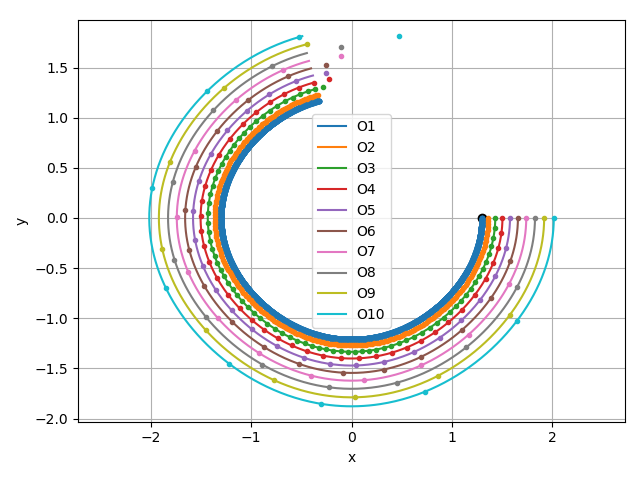

In [97]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
delt = 1.05
fact_mult = 1.0
for i in range(1,order +1,1):
# for i in range(1,4):
    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    color = 'C%d'%(int(i-1))
#     print(color)
    plt.plot(fact_mult*x_vals[:,0],fact_mult*x_vals[:,1],color,linewidth=1.5, label="O%d"%(i))
    for j in range(len(sol)):
#         plt.plot(fact_mult*sol[j][0][0],fact_mult*sol[j][0][1],color+symbols[i%len(symbols)])
        plt.plot(fact_mult*sol[j][0][0],fact_mult*sol[j][0][1],color+'.')
    # end for 1
    fact_mult *= delt
# end for
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [22]:
x_vals

array([[-1.        ,  2.        ,  0.        ],
       [-0.97995033,  2.00989983,  0.01      ],
       [-0.95980267,  2.01959868,  0.02      ],
       ...,
       [-2.19324203, -0.43554827,  4.98      ],
       [-2.19748779, -0.41359444,  4.99      ],
       [-2.20151381, -0.39159924,  5.        ]])

In [20]:
dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, x0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler

array([[-1.        ,  2.        ,  0.        ],
       [-0.97995034,  2.00989984,  0.01      ],
       [-0.95980268,  2.0195987 ,  0.02      ],
       ...,
       [-2.19324443, -0.43554995,  4.98      ],
       [-2.19749021, -0.4135961 ,  4.99      ],
       [-2.20151624, -0.39160088,  5.        ]])

<IPython.core.display.Javascript object>


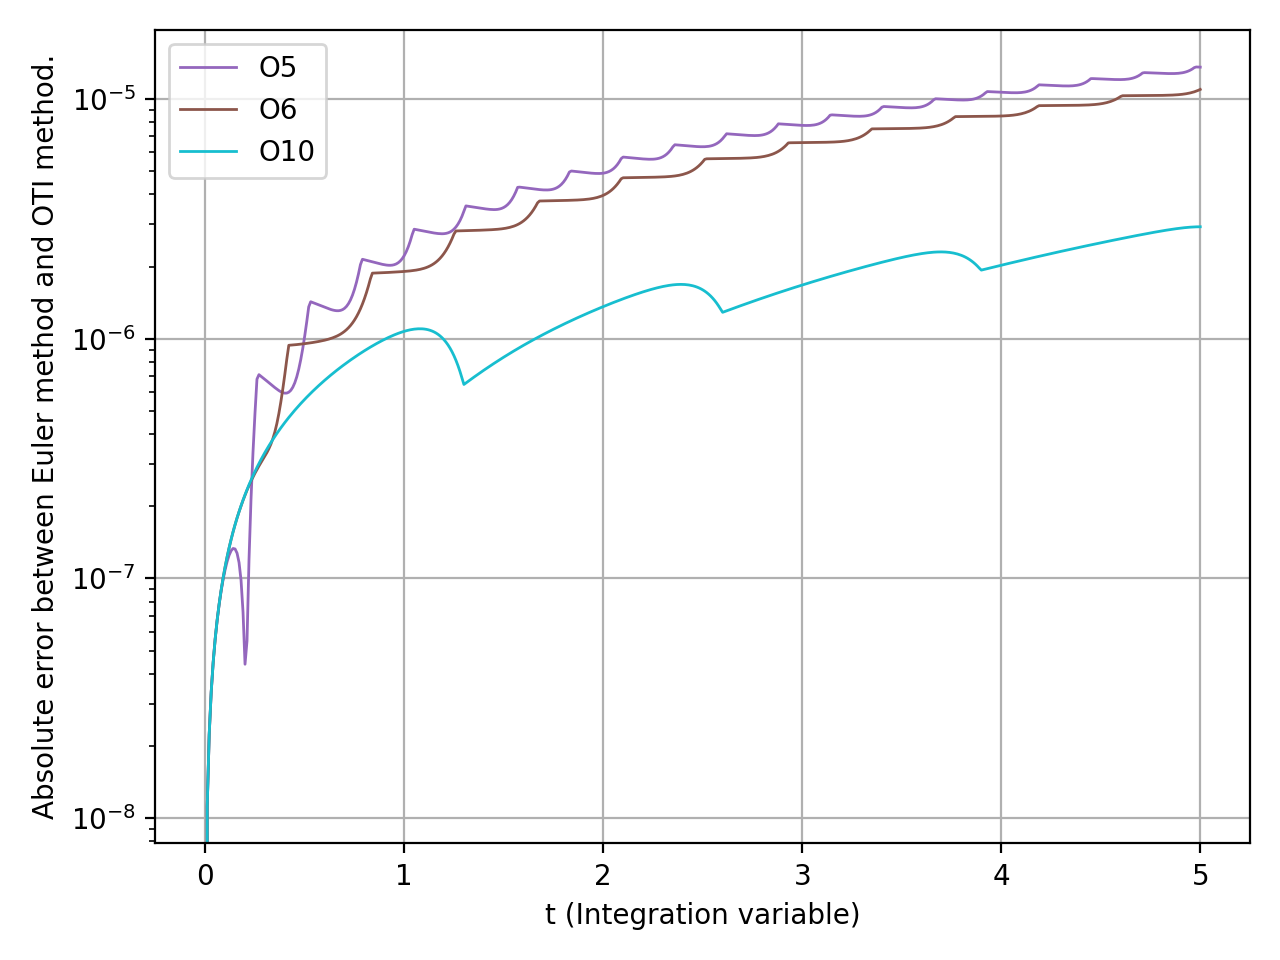

In [35]:
# Plot error values1e-6
plt.figure()

symbols = [".","o","|","s",">","<","x"]
# for i in range(1,order +1,2):
for i in [5,6,10]:

    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(x_vals[:,:2] - x_vals_euler[:,:2],axis=1)

    color = 'C%d'%(int(i-1))

    plt.semilogy(x_vals[:,2],err,color,linewidth=1.0, label="O%d"%(i))
#     for j in range(len(sol)):
#         plt.semilogy([sol[j][2],sol[j][2]],[1e-9,1e-5],'k',linewidth=1.0)
        

# end for

plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error between Euler method and OTI method.")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()


In [20]:
dt = 1e-5
x_vals_oti = []

for i in range(1,order+1):
    
    x_vals_oti.append( get_x(dt, dt_est, x, order = i ) )

# end for 


In [54]:
print("Error between Euler method with dt = ",dt," and OTI ODE solution.")
print("eps requested: ", epsilon)
print("eps obtained:  ", np.linalg.norm(xf-x_vals_euler[-1]))
np.linalg.norm(xf-x_vals_euler[-1])

Error between Euler method with dt =  1e-05  and OTI ODE solution.
eps requested:  0.0001
eps obtained:   0.00010221031273765867


0.00010221031273765867

<IPython.core.display.Javascript object>


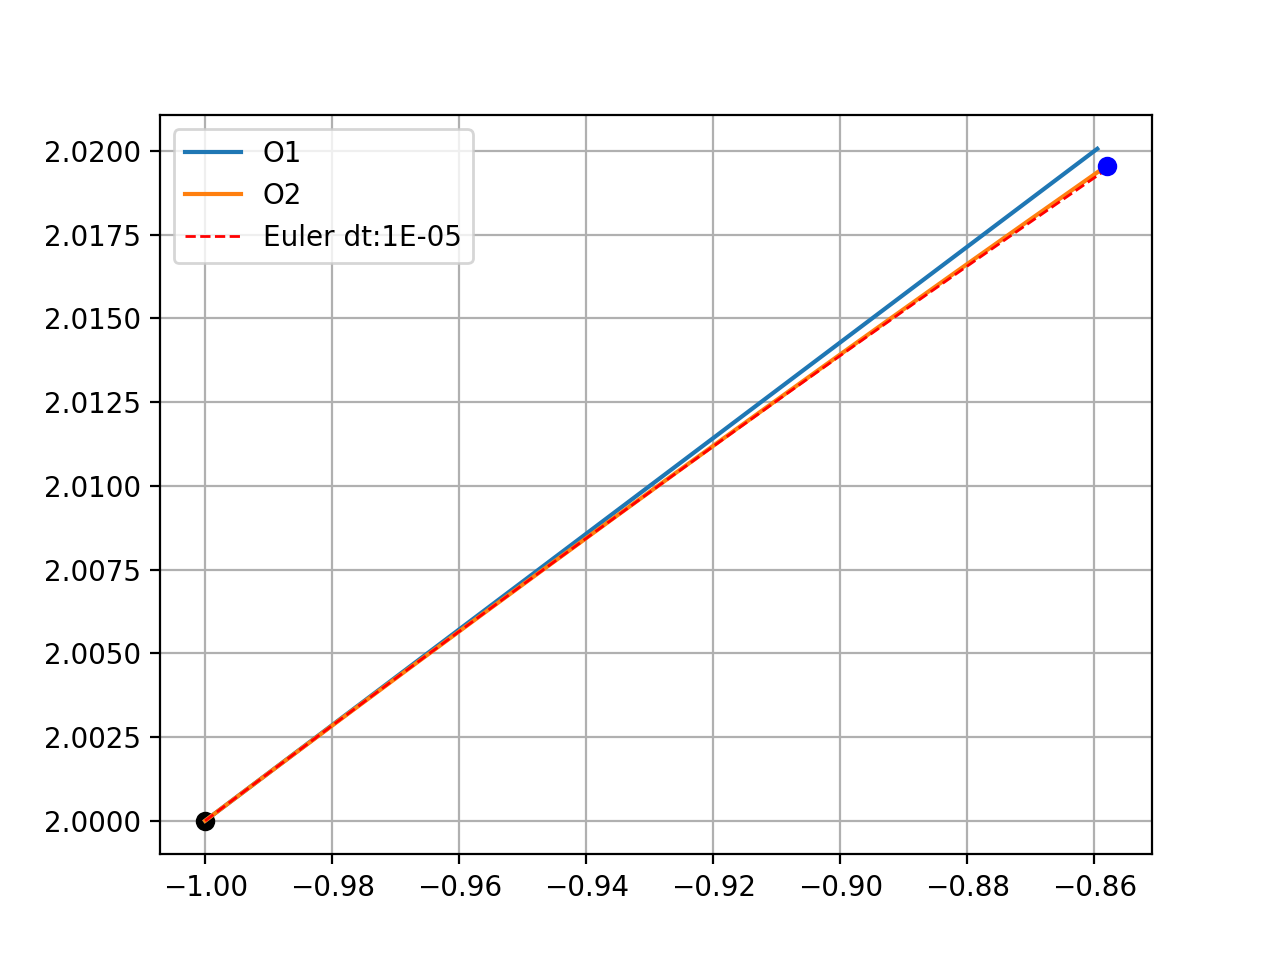

In [56]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
# plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=2.5, label="Euler dt:%.0E"%dt)

for i in range(1,order+1):
    label = "O%d"%(i)
#     print(label)
    plt.plot(x_vals_oti[i-1][:,0],x_vals_oti[i-1][:,1],'C%d'%(int(i-1)),label=label)
# end for

plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=1.0, label="Euler dt:%.0E"%dt)

plt.plot(xf[0],xf[1],'bo')
plt.legend()
plt.grid('on')
plt.show()

<IPython.core.display.Javascript object>


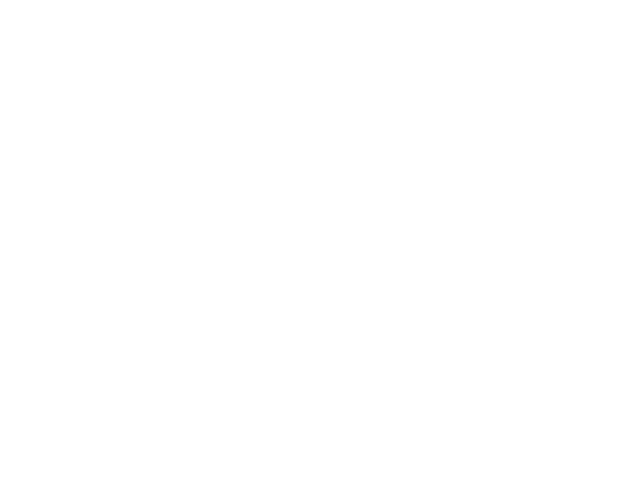

ValueError: operands could not be broadcast together with shapes (10661,) (10662,) 

In [11]:
plt.figure()

error = np.sqrt((x_vals_euler[:,0] - x_vals_oti[:,0])**2 + (x_vals_euler[:,1]-x_vals_oti[:,1])**2)
plt.plot(error,'r',linewidth=2.5)

plt.show()

In [40]:
# Analytical derivatives:

import sympy as sym

xs,ys = sym.symbols('x,y')

In [41]:
f1s,f2s = F_eval([xs,ys])

In [42]:
f1s

-(x**2 - y**2)/(x**2 + y**2)**2 + 1

In [43]:
f2s

-2*x*y/(x**2 + y**2)**2

In [37]:
i=2
"O{0}".format(i)

'O2'